In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [138]:
Y=pd.read_parquet('train_targets.parquet')
#print(Y.columns)
print(Y.iloc[:int(118669/4),:])
print(Y['pv_measurement'])
Y=np.array(Y['pv_measurement'])

                     time  pv_measurement
0     2019-06-02 22:00:00            0.00
1     2019-06-02 23:00:00            0.00
2     2019-06-03 00:00:00            0.00
3     2019-06-03 01:00:00            0.00
4     2019-06-03 02:00:00           19.36
...                   ...             ...
29662 2022-10-20 20:00:00            0.00
29663 2022-10-20 21:00:00            0.00
29664 2022-10-20 22:00:00            0.00
29665 2022-10-20 23:00:00            0.00
29666 2022-10-21 00:00:00            0.00

[29667 rows x 2 columns]
0         0.00
1         0.00
2         0.00
3         0.00
4        19.36
         ...  
34080     9.02
34081     0.00
34082     0.00
34083     0.00
34084     0.00
Name: pv_measurement, Length: 34085, dtype: float64


In [139]:
data=pd.read_parquet('X_train_observed.parquet')
n=0
values=[]
for el in data['date_forecast']:
    #print(el)
    #values.append(Y[el])
    n=n+1

#print(n)
#Y=np.array(data)
#data=data.drop('date_forecast',axis=1)
data=data.drop('date_forecast',axis=1)
#print(data)
# copy the data
df_max_scaled = data.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
	
# view normalized data
display(df_max_scaled)
data=df_max_scaled
#data.columns

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,0.440000,0.861948,0.141534,0.0,0.0,0.149281,0.0,0.954050,0.0,0.0,...,0.952322,-0.064035,0.0,0.942631,1.000,0.555573,0.243421,-0.292683,-0.086022,-0.0
1,0.440000,0.861247,0.140650,0.0,0.0,0.148348,0.0,0.954050,0.0,0.0,...,0.961933,-0.072994,0.0,0.943291,1.000,0.562354,0.236842,-0.292683,-0.064516,-0.0
2,0.440000,0.860547,0.139798,0.0,0.0,0.147450,0.0,0.954050,0.0,0.0,...,0.971583,-0.079954,0.0,0.943950,1.000,0.569423,0.236842,-0.292683,-0.043011,-0.0
3,0.440000,0.859145,0.138979,0.0,0.0,0.146586,0.0,0.954050,0.0,0.0,...,0.981258,-0.084933,0.0,0.944939,1.000,0.576786,0.230263,-0.284553,-0.021505,-0.0
4,0.440000,0.858444,0.138184,0.0,0.0,0.145748,0.0,0.954050,0.0,0.0,...,0.990956,-0.087853,0.0,0.945598,1.000,0.584442,0.230263,-0.284553,0.000000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,0.285714,0.905396,NaN,0.0,0.0,NaN,0.0,0.931586,0.0,0.0,...,0.046145,-0.726062,0.0,0.912957,0.028,0.361472,0.085526,-0.032520,0.129032,-0.0
118665,0.285714,0.905396,NaN,0.0,0.0,NaN,0.0,0.931586,0.0,0.0,...,0.058703,-0.715183,0.0,0.912628,0.023,0.400289,0.092105,-0.048780,0.129032,-0.0
118666,0.285714,0.905396,NaN,0.0,0.0,NaN,0.0,0.931586,0.0,0.0,...,0.071095,-0.701844,0.0,0.911968,0.017,0.438933,0.092105,-0.065041,0.129032,-0.0
118667,0.285714,0.905396,NaN,0.0,0.0,NaN,0.0,0.931246,0.0,0.0,...,0.083300,-0.686165,0.0,0.911639,0.011,0.477402,0.098684,-0.081301,0.118280,-0.0


In [140]:
dt= np.array(data)
values=[]
for el in range(len(dt)):
    #print(el)
    if(el%4==0):
        if el>0:
            values.append(temp)
        temp=dt[el]
    else:
        temp=temp+dt[el]
    if el==n:
        break
print(len(values))
#print(values)

X_train=np.array(values)
print(X_train.shape)
X_train=X_train.T
print(X_train.shape)
Y=Y[:29667]
print(len(Y))
print(Y)
Y[np.isnan(Y)] = 0
Y=Y+50
print(Y.shape)
X_train[np.isnan(X_train)]=0
#Y=Y+50

29667
(29667, 45)
(45, 29667)
29667
[0. 0. 0. ... 0. 0. 0.]
(29667,)


In [141]:
def poly(z):
    return 1/(1+np.exp(-z))

In [142]:
def model(X,Y,learning_rate,iterations,B=0):
    m=X_train.shape[1]
    n=X_train.shape[0]
    W=np.ones((n,1))
    cost_list=[]
    #print(Z)
    #print(W)
    #print(Z)
    for i in range(iterations):
        Z=np.dot(W.T,X)+B
        A=poly(Z)
        #cost function
        '''cost=-(1/m)*np.sum(A-poly(Y))
        #Gradient Descent
        dW = (1/m)*np.dot(A-poly(Y), X.T)
        dB = (1/m)*np.sum(A - poly(Y))
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        '''
        cost=-(1/m)*np.sum(A-Y)
        #Gradient Descent
        dW = -(1/m)*np.dot(A-Y, X.T)
        dB = -(1/m)*np.sum(A - Y)
        W = W - learning_rate*dW.T
        print(dW)
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)
        #print(cost)
        
        #if(i%(iterations/10) == 0):
    print("cross entropy after ", i+1, "iteration is : ", cost)
        
    return W, B, cost_list 

def model():

(29667,)
[[ 1.76        1.76        1.8        ...  1.2228572   1.1885715
   1.1428572 ]
 [ 3.442887    3.4295726   3.419061   ...  3.6075683   3.6173792
   3.6215837 ]
 [ 0.5609604   0.54826623  0.50719064 ...  0.          0.
   0.        ]
 ...
 [-1.1626016  -1.0894308  -0.95934963 ...  0.01626016 -0.05691057
  -0.22764227]
 [-0.21505377  0.11827956  0.32258064 ...  0.6021505   0.5591397
   0.50537634]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]]
[50. 50. 50. ... 50. 50. 50.]
[[ 1.27578418e+03  2.48613556e+03  5.73807885e+02  1.69281474e+03
   1.71032370e+03  4.75143737e+02  5.23420164e+00  2.75219587e+03
   1.01074355e+03  1.02873849e+03  9.53130283e+02  9.42803531e+02
   1.60590884e+03  2.89258208e+03  2.62105811e+00  2.49491662e-01
   5.22813528e+00  4.29239981e-01  6.27544999e-01  2.79622354e+03
   1.10926834e+02  2.80770862e+03  3.26735609e+00  1.65803220e+01
   2.80718329e+03  2.80664119e+03  5.23758832e-01  1.09747302e+01
   1.87859000e+03  2.80591

C:\Users\itsja\AppData\Local\Temp\ipykernel_12056\4070723185.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


[[ 1.27730477e+03  2.48963679e+03  5.74521084e+02  1.69361243e+03
   1.71111998e+03  4.75677360e+02  5.32379614e+00  2.75596474e+03
   1.01126329e+03  1.02927506e+03  9.53459089e+02  9.43136113e+02
   1.60861308e+03  2.89658208e+03  2.63512909e+00  2.54023158e-01
   5.25627924e+00  4.35962705e-01  6.34725377e-01  2.79830912e+03
   1.12973418e+02  2.81157694e+03  3.27865943e+00  1.66410011e+01
   2.81105084e+03  2.81050842e+03  5.32746848e-01  1.10087699e+01
   1.88155927e+03  2.80977739e+03  1.48352419e+01  6.16728831e+00
  -0.00000000e+00  1.30477471e-01  1.49766300e+01  1.42400475e+03
   1.69261762e+03  7.43259015e+01  2.71727150e+03  1.86165640e+03
   1.62872221e+03  5.34449044e+02  1.05584965e+02 -1.03784904e+02
   2.06957899e-01]]
[[ 1.27730477e+03  2.48963679e+03  5.74521084e+02  1.69361243e+03
   1.71111998e+03  4.75677360e+02  5.32379614e+00  2.75596474e+03
   1.01126329e+03  1.02927506e+03  9.53459089e+02  9.43136113e+02
   1.60861308e+03  2.89658208e+03  2.63512909e+00  2.540

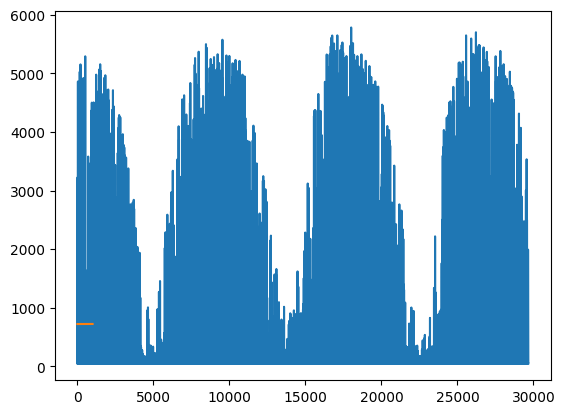

724.1455209492029


In [151]:
learning_rate=.00015
iterations=1000
print(Y.shape)
print(X_train)

print(Y)
a,b,c=model(X_train,Y,learning_rate,1000,B=0)
plt.plot(Y)
#plt.plot(c)
plt.show() 
print(sum(Y)/len(Y))   

In [161]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = Z
    
    A = np.array(A, dtype = 'int64')
    #print(A)
    acc = np.sum(np.abs(A - Y))/Y.shape
    print(np.abs(A-Y))
    #print(acc)
    #print(A)
    #print(Y)
    print("Accuracy of the model is : ", (acc))
    return(A)

In [166]:
prediction=accuracy(X_train, Y, a, b)
print(Y)
print(sum(prediction)/len(prediction))

[[17487. 16726. 16279. ... 14824. 14003. 13849.]]
Accuracy of the model is :  [18666.00320794]
[50. 50. 50. ... 50. 50. 50.]
[-17437. -16676. -16229. ... -14774. -13953. -13799.]
